# Libaraies

In [85]:
%%capture
!pip install pandas matplotlib seaborn scikit-learn statsmodels
#Import and configure the required modules.
# Define required imports
import pandas as pd
import numpy as np
import sys
import re
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

# ETL (Extract Transform and Load)

Extract

In [50]:
raw_data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/fJKLoMKtgpDAl5MkA6rf2A/jfk-weather.csv", parse_dates=['DATE'])
raw_data.head()

/tmp/ipython-input-1932159034.py:1: DtypeWarning: Columns (8,10,11,12,13,14,15,16,17,20,22,23,25,40,63,64,67,68,69,84,85,86,87) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/fJKLoMKtgpDAl5MkA6rf2A/jfk-weather.csv", parse_dates=['DATE'])


STATION                     STATION_NAME  ELEVATION  LATITUDE  \
0  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
1  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
2  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
3  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   
4  WBAN:94789  JFK INTERNATIONAL AIRPORT NY US        3.4   40.6386   

   LONGITUDE                DATE REPORTTPYE           HOURLYSKYCONDITIONS  \
0   -73.7622 2010-01-01 00:51:00      FM-15  FEW:02 7 SCT:04 13 BKN:07 29   
1   -73.7622 2010-01-01 01:00:00      FM-12                           NaN   
2   -73.7622 2010-01-01 01:51:00      FM-15  FEW:02 6 SCT:04 13 OVC:08 35   
3   -73.7622 2010-01-01 02:03:00      FM-16  FEW:02 6 SCT:04 13 OVC:08 35   
4   -73.7622 2010-01-01 02:28:00      FM-16  BKN:07 7 BKN:07 15 OVC:08 35   

  HOURLYVISIBILITY                      HOURLYPRSENTWEATHERTYPE  ...  \
0             6.00  -RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79  ...   
1             5.59                                      ||PL:79  ...   
2             6.00  -RA:02 PL:06 BR:1 |RA:61 PL:74 |RA:61 PL:79  ...   
3             6.00                    -RA:02 BR:1 |RA:61 |RA:61  ...   
4             5.00                    -RA:02 BR:1 |RA:61 |RA:61  ...   

  MonthlyMaxSeaLevelPressureTime MonthlyMinSeaLevelPressureValue  \
0                          -9999                             NaN   
1                          -9999                             NaN   
2                          -9999                             NaN   
3                          -9999                             NaN   
4                          -9999                             NaN   

  MonthlyMinSeaLevelPressureDate MonthlyMinSeaLevelPressureTime  \
0                          -9999                          -9999   
1                          -9999                          -9999   
2                          -9999                          -9999   
3                          -9999                          -9999   
4                          -9999                          -9999   

  MonthlyTotalHeatingDegreeDays MonthlyTotalCoolingDegreeDays  \
0                           NaN                           NaN   
1                           NaN                           NaN   
2                           NaN                           NaN   
3                           NaN                           NaN   
4                           NaN                           NaN   

  MonthlyDeptFromNormalHeatingDD MonthlyDeptFromNormalCoolingDD  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

  MonthlyTotalSeasonToDateHeatingDD  MonthlyTotalSeasonToDateCoolingDD  
0                               NaN                                NaN  
1                               NaN                                NaN  
2                               NaN                                NaN  
3                               NaN                                NaN  
4                               NaN                                NaN  

[5 rows x 90 columns]

Based on the above kernel, it shows that there are 90 columns which have the different data types so we are going to the points and select the most relevant columns for more information about the dataset please refer to this  link: https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/7B7CdrStANaslFDaQPTbOw/Noaadataset.html

In [51]:
# Choose what columns to import from raw data
column_subset = [
    'DATE',
    'HOURLYVISIBILITY',
    'HOURLYDRYBULBTEMPF',
    'HOURLYWETBULBTEMPF',
    'HOURLYDewPointTempF',
    'HOURLYRelativeHumidity',
    'HOURLYWindSpeed',
    'HOURLYWindDirection',
    'HOURLYStationPressure',
    'HOURLYPressureTendency',
    'HOURLYSeaLevelPressure',
    'HOURLYPrecip',
    'HOURLYAltimeterSetting'
]
hourly_data = raw_data[column_subset]
# Set date index
hourly_data = hourly_data.set_index(pd.DatetimeIndex(hourly_data['DATE']))
hourly_data.drop(['DATE'], axis=1, inplace=True)
hourly_data.replace(to_replace='*', value=np.nan, inplace=True)
hourly_data.head()

HOURLYVISIBILITY HOURLYDRYBULBTEMPF HOURLYWETBULBTEMPF  \
DATE                                                                         
2010-01-01 00:51:00             6.00               33.0               32.0   
2010-01-01 01:00:00             5.59               33.0               32.0   
2010-01-01 01:51:00             6.00               33.0               33.0   
2010-01-01 02:03:00             6.00               34.0               33.0   
2010-01-01 02:28:00             5.00               34.0               33.0   

                    HOURLYDewPointTempF HOURLYRelativeHumidity  \
DATE                                                             
2010-01-01 00:51:00                  31                   92.0   
2010-01-01 01:00:00                  31                   92.0   
2010-01-01 01:51:00                  32                   96.0   
2010-01-01 02:03:00                  32                   93.0   
2010-01-01 02:28:00                  32                   93.0   

                    HOURLYWindSpeed HOURLYWindDirection HOURLYStationPressure  \
DATE                                                                            
2010-01-01 00:51:00             0.0                 000                 29.97   
2010-01-01 01:00:00             0.0                 000                 29.96   
2010-01-01 01:51:00             0.0                 000                 29.97   
2010-01-01 02:03:00             0.0                 000                 29.97   
2010-01-01 02:28:00             0.0                 000                 29.97   

                     HOURLYPressureTendency HOURLYSeaLevelPressure  \
DATE                                                                 
2010-01-01 00:51:00                     8.0                  29.99   
2010-01-01 01:00:00                     8.0                  29.99   
2010-01-01 01:51:00                     NaN                  29.99   
2010-01-01 02:03:00                     NaN                    NaN   
2010-01-01 02:28:00                     NaN                    NaN   

                    HOURLYPrecip HOURLYAltimeterSetting  
DATE                                                     
2010-01-01 00:51:00         0.01                  29.99  
2010-01-01 01:00:00          NaN                    NaN  
2010-01-01 01:51:00         0.02                  29.99  
2010-01-01 02:03:00            T                  29.99  
2010-01-01 02:28:00            T                  29.99

In [52]:
#hourly_data.reset_index(inplace=True)
hourly_data.dtypes

HOURLYVISIBILITY           object
HOURLYDRYBULBTEMPF         object
HOURLYWETBULBTEMPF         object
HOURLYDewPointTempF        object
HOURLYRelativeHumidity     object
HOURLYWindSpeed            object
HOURLYWindDirection        object
HOURLYStationPressure      object
HOURLYPressureTendency    float64
HOURLYSeaLevelPressure     object
HOURLYPrecip               object
HOURLYAltimeterSetting     object
dtype: object

Data Cleansing

It is observed that precipitation column contians the both Nan and T values T specifies trace amounts of precipitation, while NaN means not a number, and is used to denote missing values.

In [53]:
hourly_data['HOURLYPrecip'].unique()

array(['0.01', nan, '0.02', 'T', '0.00', '0.10', '0.07', '0.03', '0.05',
       '0.15', '0.06', '0.08', '0.04', '0.09', '0.11', '0.20', '0.13',
       '0.14', '0.05s', '0.12', '0.24', '0.02s', '0.17', '0.16', '0.47',
       '0.28', '0.32', '0.19', '0.22', '0.18', '0.26', '0.23', '0.30',
       '0.33', '0.04s', '0.36', '0.40', '0.41', '0.51', '0.50', '0.68s',
       '0.21', '0.35', '0.54', '0.01s', '0.34', '0.94', '1.14', '1.18',
       '1.15', '0.65', '0.74', '0.39', '0.67', '0.29', '0.46', '0.87',
       '1.10', '0.52', '0.08s', '0.37', '0.42', '0.03s', '0.09s', '0.11s',
       '0.10s', '0.25', '0.33s', '0.13s', '0.38', '0.64s', '0.06s',
       '0.17s', '0.69s', '0.73', '2.41', '0.57', '0.84', '0.86', '0.27',
       '0.60', '0.45', '0.75', '1.26', '0.59', '0.68', '0.79', '0.70',
       '0.44', '0.43', '0.53', '0.37s', '0.77', '0.85', '0.93', '0.55',
       '0.56', '1.52', '1.05', '1.76', '0.07s', '0.63', '1.19', '0.12s',
       '0.18s', '0.58', '0.48', '0.66', '0.29s', '0.71', '0.20s'

There are also some strange values in it such as 0.02.01s so we have to correct these. T to 0.00 and 0.02.01s to nan

# Transform

In [54]:
# Fix imported data
hourly_data['HOURLYPrecip'] = (
    hourly_data['HOURLYPrecip']
    .replace('T', '0.00')
    .replace('0.020.01s', np.nan)
)


Convert all the columns into numerical types

In [55]:
# Set of columns to convert
messy_columns = column_subset[1:]

# Convert columns to float32 datatype
for i in messy_columns:
    hourly_data[i] = hourly_data[i].apply(lambda x: re.sub('[^0-9,.-]', '', x) if type(x) == str else x).replace('', np.nan).astype(('float32'))

In [56]:
print(hourly_data.info())
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114545 entries, 2010-01-01 00:51:00 to 2018-07-27 23:59:00
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   HOURLYVISIBILITY        96464 non-null   float32
 1   HOURLYDRYBULBTEMPF      111403 non-null  float32
 2   HOURLYWETBULBTEMPF      111245 non-null  float32
 3   HOURLYDewPointTempF     111395 non-null  float32
 4   HOURLYRelativeHumidity  111395 non-null  float32
 5   HOURLYWindSpeed         111358 non-null  float32
 6   HOURLYWindDirection     110444 non-null  float32
 7   HOURLYStationPressure   111256 non-null  float32
 8   HOURLYPressureTendency  48038 non-null   float32
 9   HOURLYSeaLevelPressure  99522 non-null   float32
 10  HOURLYPrecip            79762 non-null   float32
 11  HOURLYAltimeterSetting  86878 non-null   float32
dtypes: float32(12)
memory usage: 6.1 MB
None


HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
DATE                                                                            
2010-01-01 00:51:00              6.00                33.0                32.0   
2010-01-01 01:00:00              5.59                33.0                32.0   
2010-01-01 01:51:00              6.00                33.0                33.0   
2010-01-01 02:03:00              6.00                34.0                33.0   
2010-01-01 02:28:00              5.00                34.0                33.0   

                     HOURLYDewPointTempF  HOURLYRelativeHumidity  \
DATE                                                               
2010-01-01 00:51:00                 31.0                    92.0   
2010-01-01 01:00:00                 31.0                    92.0   
2010-01-01 01:51:00                 32.0                    96.0   
2010-01-01 02:03:00                 32.0                    93.0   
2010-01-01 02:28:00                 32.0                    93.0   

                     HOURLYWindSpeed  HOURLYWindDirection  \
DATE                                                        
2010-01-01 00:51:00              0.0                  0.0   
2010-01-01 01:00:00              0.0                  0.0   
2010-01-01 01:51:00              0.0                  0.0   
2010-01-01 02:03:00              0.0                  0.0   
2010-01-01 02:28:00              0.0                  0.0   

                     HOURLYStationPressure  HOURLYPressureTendency  \
DATE                                                                 
2010-01-01 00:51:00              29.969999                     8.0   
2010-01-01 01:00:00              29.959999                     8.0   
2010-01-01 01:51:00              29.969999                     NaN   
2010-01-01 02:03:00              29.969999                     NaN   
2010-01-01 02:28:00              29.969999                     NaN   

                     HOURLYSeaLevelPressure  HOURLYPrecip  \
DATE                                                        
2010-01-01 00:51:00                   29.99          0.01   
2010-01-01 01:00:00                   29.99           NaN   
2010-01-01 01:51:00                   29.99          0.02   
2010-01-01 02:03:00                     NaN          0.00   
2010-01-01 02:28:00                     NaN          0.00   

                     HOURLYAltimeterSetting  
DATE                                         
2010-01-01 00:51:00                   29.99  
2010-01-01 01:00:00                     NaN  
2010-01-01 01:51:00                   29.99  
2010-01-01 02:03:00                   29.99  
2010-01-01 02:28:00                   29.99

Reformat and process data

In [43]:
# Generate the summary statistics for each column
hourly_data.describe()

HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
count      96464.000000       111403.000000       111245.000000   
mean           8.758805           55.310612           49.703098   
std            2.743144           17.169971           16.061544   
min            0.000000            1.000000           -1.000000   
25%            9.940000           42.000000           37.000000   
50%           10.000000           56.000000           50.000000   
75%           10.000000           70.000000           64.000000   
max           99.419998          102.000000           85.000000   

       HOURLYDewPointTempF  HOURLYRelativeHumidity  HOURLYWindSpeed  \
count        111395.000000           111395.000000    111358.000000   
mean             43.309196               67.132141        11.268045   
std              19.356941               20.278189         6.175224   
min             -22.000000                8.000000         0.000000   
25%              29.000000               51.000000         7.000000   
50%              45.000000               69.000000        10.000000   
75%              60.000000               85.000000        15.000000   
max              84.000000              100.000000        53.000000   

       HOURLYWindDirection  HOURLYStationPressure  HOURLYPressureTendency  \
count        110444.000000          111256.000000            48038.000000   
mean            192.511597              29.990641                4.388963   
std             107.608009               0.238463                2.741891   
min               0.000000              28.490000                0.000000   
25%             110.000000              29.850000                2.000000   
50%             200.000000              29.990000                5.000000   
75%             280.000000              30.139999                7.000000   
max             360.000000              30.830000                8.000000   

       HOURLYSeaLevelPressure  HOURLYPrecip  HOURLYAltimeterSetting  
count            99522.000000  79762.000000            86878.000000  
mean                30.026194      0.007032               30.009533  
std                  0.233694      0.042610                0.239828  
min                 28.540001      0.000000               28.510000  
25%                 29.879999      0.000000               29.870001  
50%                 30.020000      0.000000               30.010000  
75%                 30.170000      0.000000               30.160000  
max                 30.850000      2.410000               30.850000

In [44]:
# Check if categorical variable HOURLYPressureTendency ever has a non-integer entry outside the bounds of 0-8
cond = len(hourly_data[~hourly_data['HOURLYPressureTendency'].isin(list(range(0,9)) + [np.nan])])
print('Hourly Pressure Tendency should be between 0 and 8: {}'.format(cond == 0))

Hourly Pressure Tendency should be between 0 and 8: True


In [45]:
# Hourly Visibility should be between 0 and 10
hourly_data[(hourly_data['HOURLYVISIBILITY'] < 0) | (hourly_data['HOURLYVISIBILITY'] > 10)]

HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  HOURLYWETBULBTEMPF  \
DATE                                                                            
2011-10-16 11:51:00         14.000000                68.0                53.0   
2015-06-21 17:45:00         99.419998                79.0                72.0   

                     HOURLYDewPointTempF  HOURLYRelativeHumidity  \
DATE                                                               
2011-10-16 11:51:00                 37.0                    33.0   
2015-06-21 17:45:00                 68.0                    70.0   

                     HOURLYWindSpeed  HOURLYWindDirection  \
DATE                                                        
2011-10-16 11:51:00             16.0                250.0   
2015-06-21 17:45:00             37.0                310.0   

                     HOURLYStationPressure  HOURLYPressureTendency  \
DATE                                                                 
2011-10-16 11:51:00                  29.85                     NaN   
2015-06-21 17:45:00                  29.74                     NaN   

                     HOURLYSeaLevelPressure  HOURLYPrecip  \
DATE                                                        
2011-10-16 11:51:00                     NaN           NaN   
2015-06-21 17:45:00                     NaN           0.0   

                     HOURLYAltimeterSetting  
DATE                                         
2011-10-16 11:51:00               29.870001  
2015-06-21 17:45:00               29.760000

In [46]:
# Replace any hourly visibility figure outside these bounds with nan
hourly_data.loc[hourly_data['HOURLYVISIBILITY'] > 10, 'HOURLYVISIBILITY'] = np.nan

# Hourly Visibility should be between 0 and 10
cond = len(hourly_data[(hourly_data['HOURLYVISIBILITY'] < 0) | (hourly_data['HOURLYVISIBILITY'] > 10)])
print('Hourly Visibility should be between 0 and 10: {}'.format(cond == 0))

Hourly Visibility should be between 0 and 10: True


Finally, we check if there are any duplicates with respect to our DATE index and check furthermore that our dates are in the correct order (that is, strictly increasing).

In [59]:
cond = len(hourly_data[hourly_data.index.duplicated()].sort_index())
print('Date index contains no duplicate entries: {}'.format(cond == 0))

Date index contains no duplicate entries: True


In [60]:
# Make sure time index is sorted and increasing
print('Date index is strictly increasing: {}'.format(hourly_data.index.is_monotonic_increasing))

Date index is strictly increasing: True


In [61]:
hourly_data.reset_index(inplace=True)

#hourly_data.reset_index(inplace=True)
hourly_data.columns

Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYWindDirection', 'HOURLYStationPressure',
       'HOURLYPressureTendency', 'HOURLYSeaLevelPressure', 'HOURLYPrecip',
       'HOURLYAltimeterSetting'],
      dtype='object')

We will now also replace missing values. For numerical values, we will linearly interpolate between the previous and next valid obvservations. For the categorical HOURLYPressureTendency field, we will replace missing values with the last valid observation.

In [62]:
hourly_data['HOURLYPressureTendency'] = (
    hourly_data['HOURLYPressureTendency'].ffill()
)# fill with last valid observation
hourly_data = hourly_data.interpolate(method='linear') # interpolate missing values
hourly_data.drop(hourly_data.index[0], inplace=True) # drop first row

In [63]:
print(hourly_data.info())
print()
hourly_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114543 entries, 1 to 114543
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   DATE                    114543 non-null  datetime64[ns]
 1   HOURLYVISIBILITY        114543 non-null  float32       
 2   HOURLYDRYBULBTEMPF      114543 non-null  float32       
 3   HOURLYWETBULBTEMPF      114543 non-null  float32       
 4   HOURLYDewPointTempF     114543 non-null  float32       
 5   HOURLYRelativeHumidity  114543 non-null  float32       
 6   HOURLYWindSpeed         114543 non-null  float32       
 7   HOURLYWindDirection     114543 non-null  float32       
 8   HOURLYStationPressure   114543 non-null  float32       
 9   HOURLYPressureTendency  114543 non-null  float32       
 10  HOURLYSeaLevelPressure  114543 non-null  float32       
 11  HOURLYPrecip            114543 non-null  float32       
 12  HOURLYAltimeterSetting  114543

DATE  HOURLYVISIBILITY  HOURLYDRYBULBTEMPF  \
1 2010-01-01 01:51:00               6.0                33.0   
2 2010-01-01 02:03:00               6.0                34.0   
3 2010-01-01 02:28:00               5.0                34.0   
4 2010-01-01 02:51:00               5.0                33.0   
5 2010-01-01 03:51:00               5.0                33.0   

   HOURLYWETBULBTEMPF  HOURLYDewPointTempF  HOURLYRelativeHumidity  \
1                33.0                 32.0                    96.0   
2                33.0                 32.0                    93.0   
3                33.0                 32.0                    93.0   
4                33.0                 32.0                    96.0   
5                33.0                 32.0                    96.0   

   HOURLYWindSpeed  HOURLYWindDirection  HOURLYStationPressure  \
1              0.0                  0.0              29.969999   
2              0.0                  0.0              29.969999   
3              0.0                  0.0              29.969999   
4              0.0                  0.0              29.969999   
5              0.0                  0.0              29.950001   

   HOURLYPressureTendency  HOURLYSeaLevelPressure  HOURLYPrecip  \
1                     8.0               29.990000          0.02   
2                     8.0               29.990000          0.00   
3                     8.0               29.990000          0.00   
4                     8.0               29.990000          0.00   
5                     8.0               29.969999          0.00   

   HOURLYAltimeterSetting  
1               29.990000  
2               29.990000  
3               29.990000  
4               29.990000  
5               29.969999

Feature encoding

The final pre-processing step we will perform will be to handle two of our columns in a special way in order to correctly encode these features. They are:

HOURLYWindDirection - wind direction
HOURLYPressureTendency - an indicator of pressure changes
For HOURLYWindDirection, we encode the raw feature value as two new values, which measure the cyclical nature of wind direction - that is, we are encoding the compass-point nature of wind direction measurements.

In [64]:
# Transform HOURLYWindDirection into a cyclical variable using sin and cos transforms
hourly_data['HOURLYWindDirectionSin'] = np.sin(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data['HOURLYWindDirectionCos'] = np.cos(hourly_data['HOURLYWindDirection']*(2.*np.pi/360))
hourly_data.drop(['HOURLYWindDirection'], axis=1, inplace=True)

For HOURLYPressureTendency, the feature value is in fact a categorical feature with three levels:

0-3 indicates an increase in pressure over the previous 3 hours
4 indicates no change during the previous 3 hours
5-8 indicates a decrease over the previous 3 hours Hence, we encode this feature into 3 dummy values representing these 3 potential states.

In [65]:
# Transform HOURLYPressureTendency into 3 dummy variables based on NOAA documentation
hourly_data['HOURLYPressureTendencyIncr'] = [1.0 if x in [0,1,2,3] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 0 through 3 indicates an increase in pressure over previous 3 hours
hourly_data['HOURLYPressureTendencyDecr'] = [1.0 if x in [5,6,7,8] else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 5 through 8 indicates a decrease over previous 3 hours
hourly_data['HOURLYPressureTendencyConst'] = [1.0 if x == 4 else 0.0 for x in hourly_data['HOURLYPressureTendency']] # 4 indicates no change during previous 3 hours
hourly_data.drop(['HOURLYPressureTendency'], axis=1, inplace=True)
hourly_data['HOURLYPressureTendencyIncr'] = hourly_data['HOURLYPressureTendencyIncr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyDecr'] = hourly_data['HOURLYPressureTendencyDecr'].astype(('float32'))
hourly_data['HOURLYPressureTendencyConst'] = hourly_data['HOURLYPressureTendencyConst'].astype(('float32'))

rename Columns

In [66]:
hourly_data.columns

Index(['DATE', 'HOURLYVISIBILITY', 'HOURLYDRYBULBTEMPF', 'HOURLYWETBULBTEMPF',
       'HOURLYDewPointTempF', 'HOURLYRelativeHumidity', 'HOURLYWindSpeed',
       'HOURLYStationPressure', 'HOURLYSeaLevelPressure', 'HOURLYPrecip',
       'HOURLYAltimeterSetting', 'HOURLYWindDirectionSin',
       'HOURLYWindDirectionCos', 'HOURLYPressureTendencyIncr',
       'HOURLYPressureTendencyDecr', 'HOURLYPressureTendencyConst'],
      dtype='object')

In [67]:
# define the new column names
columns_new_name = [
    'DATE',
    'visibility',
    'dry_bulb_temp_f',
    'wet_bulb_temp_f',
    'dew_point_temp_f',
    'relative_humidity',
    'wind_speed',
    'station_pressure',
    'sea_level_pressure',
    'precip',
    'altimeter_setting',
    'wind_direction_sin',
    'wind_direction_cos',
    'pressure_tendency_incr',
    'pressure_tendency_decr',
    'pressure_tendency_const'
]

columns_name_map = {c:columns_new_name[i] for i, c in enumerate(hourly_data.columns)}

hourly_data_renamed = hourly_data.rename(columns=columns_name_map)
print(hourly_data_renamed.info())
print()
hourly_data_renamed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114543 entries, 1 to 114543
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DATE                     114543 non-null  datetime64[ns]
 1   visibility               114543 non-null  float32       
 2   dry_bulb_temp_f          114543 non-null  float32       
 3   wet_bulb_temp_f          114543 non-null  float32       
 4   dew_point_temp_f         114543 non-null  float32       
 5   relative_humidity        114543 non-null  float32       
 6   wind_speed               114543 non-null  float32       
 7   station_pressure         114543 non-null  float32       
 8   sea_level_pressure       114543 non-null  float32       
 9   precip                   114543 non-null  float32       
 10  altimeter_setting        114543 non-null  float32       
 11  wind_direction_sin       114543 non-null  float32       
 12  wind_direction_c

DATE  visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
1 2010-01-01 01:51:00         6.0             33.0             33.0   
2 2010-01-01 02:03:00         6.0             34.0             33.0   
3 2010-01-01 02:28:00         5.0             34.0             33.0   
4 2010-01-01 02:51:00         5.0             33.0             33.0   
5 2010-01-01 03:51:00         5.0             33.0             33.0   

   dew_point_temp_f  relative_humidity  wind_speed  station_pressure  \
1              32.0               96.0         0.0         29.969999   
2              32.0               93.0         0.0         29.969999   
3              32.0               93.0         0.0         29.969999   
4              32.0               96.0         0.0         29.969999   
5              32.0               96.0         0.0         29.950001   

   sea_level_pressure  precip  altimeter_setting  wind_direction_sin  \
1           29.990000    0.02          29.990000                 0.0   
2           29.990000    0.00          29.990000                 0.0   
3           29.990000    0.00          29.990000                 0.0   
4           29.990000    0.00          29.990000                 0.0   
5           29.969999    0.00          29.969999                 0.0   

   wind_direction_cos  pressure_tendency_incr  pressure_tendency_decr  \
1                 1.0                     0.0                     1.0   
2                 1.0                     0.0                     1.0   
3                 1.0                     0.0                     1.0   
4                 1.0                     0.0                     1.0   
5                 1.0                     0.0                     1.0   

   pressure_tendency_const  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0  
5                      0.0

In [68]:
hourly_data_renamed['DATE'] = pd.to_datetime(hourly_data_renamed['DATE'])
hourly_data_renamed.set_index('DATE', inplace=True)

In [69]:
# Explore some general information about the dataset
print('# of megabytes held by dataframe: ' + str(round(sys.getsizeof(hourly_data_renamed) / 1000000,2)))
print('# of features: ' + str(hourly_data_renamed.shape[1]))
print('# of observations: ' + str(hourly_data_renamed.shape[0]))
print('Start date: ' + str(hourly_data_renamed.index[0]))
print('End date: ' + str(hourly_data_renamed.index[-1]))
print('# of days: ' + str((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days))
print('# of months: ' + str(round((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days/30,2)))
print('# of years: ' + str(round((hourly_data_renamed.index[-1] - hourly_data_renamed.index[0]).days/365,2)))

# of megabytes held by dataframe: 7.79
# of features: 15
# of observations: 114543
Start date: 2010-01-01 01:51:00
End date: 2018-07-27 23:59:00
# of days: 3129
# of months: 104.3
# of years: 8.57


Save the clean Data

In [70]:
hourly_data_renamed.to_csv("jfk_weather_cleaned.csv", float_format='%g')

In [71]:
hourly_data_renamed

visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
DATE                                                                
2010-01-01 01:51:00         6.0             33.0             33.0   
2010-01-01 02:03:00         6.0             34.0             33.0   
2010-01-01 02:28:00         5.0             34.0             33.0   
2010-01-01 02:51:00         5.0             33.0             33.0   
2010-01-01 03:51:00         5.0             33.0             33.0   
...                         ...              ...              ...   
2018-07-27 20:26:00        10.0             70.0             69.0   
2018-07-27 20:51:00        10.0             71.0             70.0   
2018-07-27 21:51:00        10.0             72.0             71.0   
2018-07-27 22:51:00        10.0             72.0             71.0   
2018-07-27 23:59:00        10.0             72.0             71.0   

                     dew_point_temp_f  relative_humidity  wind_speed  \
DATE                                                                   
2010-01-01 01:51:00              32.0               96.0         0.0   
2010-01-01 02:03:00              32.0               93.0         0.0   
2010-01-01 02:28:00              32.0               93.0         0.0   
2010-01-01 02:51:00              32.0               96.0         0.0   
2010-01-01 03:51:00              32.0               96.0         0.0   
...                               ...                ...         ...   
2018-07-27 20:26:00              69.0               97.0         5.0   
2018-07-27 20:51:00              70.0               96.0         0.0   
2018-07-27 21:51:00              70.0               94.0         5.0   
2018-07-27 22:51:00              71.0               97.0         0.0   
2018-07-27 23:59:00              71.0               97.0         0.0   

                     station_pressure  sea_level_pressure  precip  \
DATE                                                                
2010-01-01 01:51:00         29.969999           29.990000   0.020   
2010-01-01 02:03:00         29.969999           29.990000   0.000   
2010-01-01 02:28:00         29.969999           29.990000   0.000   
2010-01-01 02:51:00         29.969999           29.990000   0.000   
2010-01-01 03:51:00         29.950001           29.969999   0.000   
...                               ...                 ...     ...   
2018-07-27 20:26:00         30.000000           30.025002   0.585   
2018-07-27 20:51:00         30.020000           30.040001   0.010   
2018-07-27 21:51:00         30.000000           30.020000   0.000   
2018-07-27 22:51:00         30.010000           30.030001   0.000   
2018-07-27 23:59:00         30.010000           30.030001   0.000   

                     altimeter_setting  wind_direction_sin  \
DATE                                                         
2010-01-01 01:51:00          29.990000            0.000000   
2010-01-01 02:03:00          29.990000            0.000000   
2010-01-01 02:28:00          29.990000            0.000000   
2010-01-01 02:51:00          29.990000            0.000000   
2010-01-01 03:51:00          29.969999            0.000000   
...                                ...                 ...   
2018-07-27 20:26:00          30.020000            0.984808   
2018-07-27 20:51:00          30.040001            0.000000   
2018-07-27 21:51:00          30.020000            0.766044   
2018-07-27 22:51:00          30.030001            0.000000   
2018-07-27 23:59:00          30.030001            0.000000   

                     wind_direction_cos  pressure_tendency_incr  \
DATE                                                              
2010-01-01 01:51:00            1.000000                     0.0   
2010-01-01 02:03:00            1.000000                     0.0   
2010-01-01 02:28:00            1.000000                     0.0   
2010-01-01 02:51:00            1.000000                     0.0   
2010-01-01 03:51:00            1.000000                     0.0   
...         

# Exploratory Data Analysis

In [73]:
import seaborn as sns
from pandas import DataFrame as df
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 160

In [75]:
data = pd.read_csv("jfk_weather_cleaned.csv")
data.head()

DATE  visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
0  2010-01-01 01:51:00         6.0             33.0             33.0   
1  2010-01-01 02:03:00         6.0             34.0             33.0   
2  2010-01-01 02:28:00         5.0             34.0             33.0   
3  2010-01-01 02:51:00         5.0             33.0             33.0   
4  2010-01-01 03:51:00         5.0             33.0             33.0   

   dew_point_temp_f  relative_humidity  wind_speed  station_pressure  \
0              32.0               96.0         0.0             29.97   
1              32.0               93.0         0.0             29.97   
2              32.0               93.0         0.0             29.97   
3              32.0               96.0         0.0             29.97   
4              32.0               96.0         0.0             29.95   

   sea_level_pressure  precip  altimeter_setting  wind_direction_sin  \
0               29.99    0.02              29.99                 0.0   
1               29.99    0.00              29.99                 0.0   
2               29.99    0.00              29.99                 0.0   
3               29.99    0.00              29.99                 0.0   
4               29.97    0.00              29.97                 0.0   

   wind_direction_cos  pressure_tendency_incr  pressure_tendency_decr  \
0                 1.0                       0                       1   
1                 1.0                       0                       1   
2                 1.0                       0                       1   
3                 1.0                       0                       1   
4                 1.0                       0                       1   

   pressure_tendency_const  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [76]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.set_index('DATE', inplace=True)
data.head()

visibility  dry_bulb_temp_f  wet_bulb_temp_f  \
DATE                                                                
2010-01-01 01:51:00         6.0             33.0             33.0   
2010-01-01 02:03:00         6.0             34.0             33.0   
2010-01-01 02:28:00         5.0             34.0             33.0   
2010-01-01 02:51:00         5.0             33.0             33.0   
2010-01-01 03:51:00         5.0             33.0             33.0   

                     dew_point_temp_f  relative_humidity  wind_speed  \
DATE                                                                   
2010-01-01 01:51:00              32.0               96.0         0.0   
2010-01-01 02:03:00              32.0               93.0         0.0   
2010-01-01 02:28:00              32.0               93.0         0.0   
2010-01-01 02:51:00              32.0               96.0         0.0   
2010-01-01 03:51:00              32.0               96.0         0.0   

                     station_pressure  sea_level_pressure  precip  \
DATE                                                                
2010-01-01 01:51:00             29.97               29.99    0.02   
2010-01-01 02:03:00             29.97               29.99    0.00   
2010-01-01 02:28:00             29.97               29.99    0.00   
2010-01-01 02:51:00             29.97               29.99    0.00   
2010-01-01 03:51:00             29.95               29.97    0.00   

                     altimeter_setting  wind_direction_sin  \
DATE                                                         
2010-01-01 01:51:00              29.99                 0.0   
2010-01-01 02:03:00              29.99                 0.0   
2010-01-01 02:28:00              29.99                 0.0   
2010-01-01 02:51:00              29.99                 0.0   
2010-01-01 03:51:00              29.97                 0.0   

                     wind_direction_cos  pressure_tendency_incr  \
DATE                                                              
2010-01-01 01:51:00                 1.0                       0   
2010-01-01 02:03:00                 1.0                       0   
2010-01-01 02:28:00                 1.0                       0   
2010-01-01 02:51:00                 1.0                       0   
2010-01-01 03:51:00                 1.0                       0   

                     pressure_tendency_decr  pressure_tendency_const  
DATE                                                                  
2010-01-01 01:51:00                       1                        0  
2010-01-01 02:03:00                       1                        0  
2010-01-01 02:28:00                       1                        0  
2010-01-01 02:51:00                       1                        0  
2010-01-01 03:51:00                       1                        0

Visualize the Data

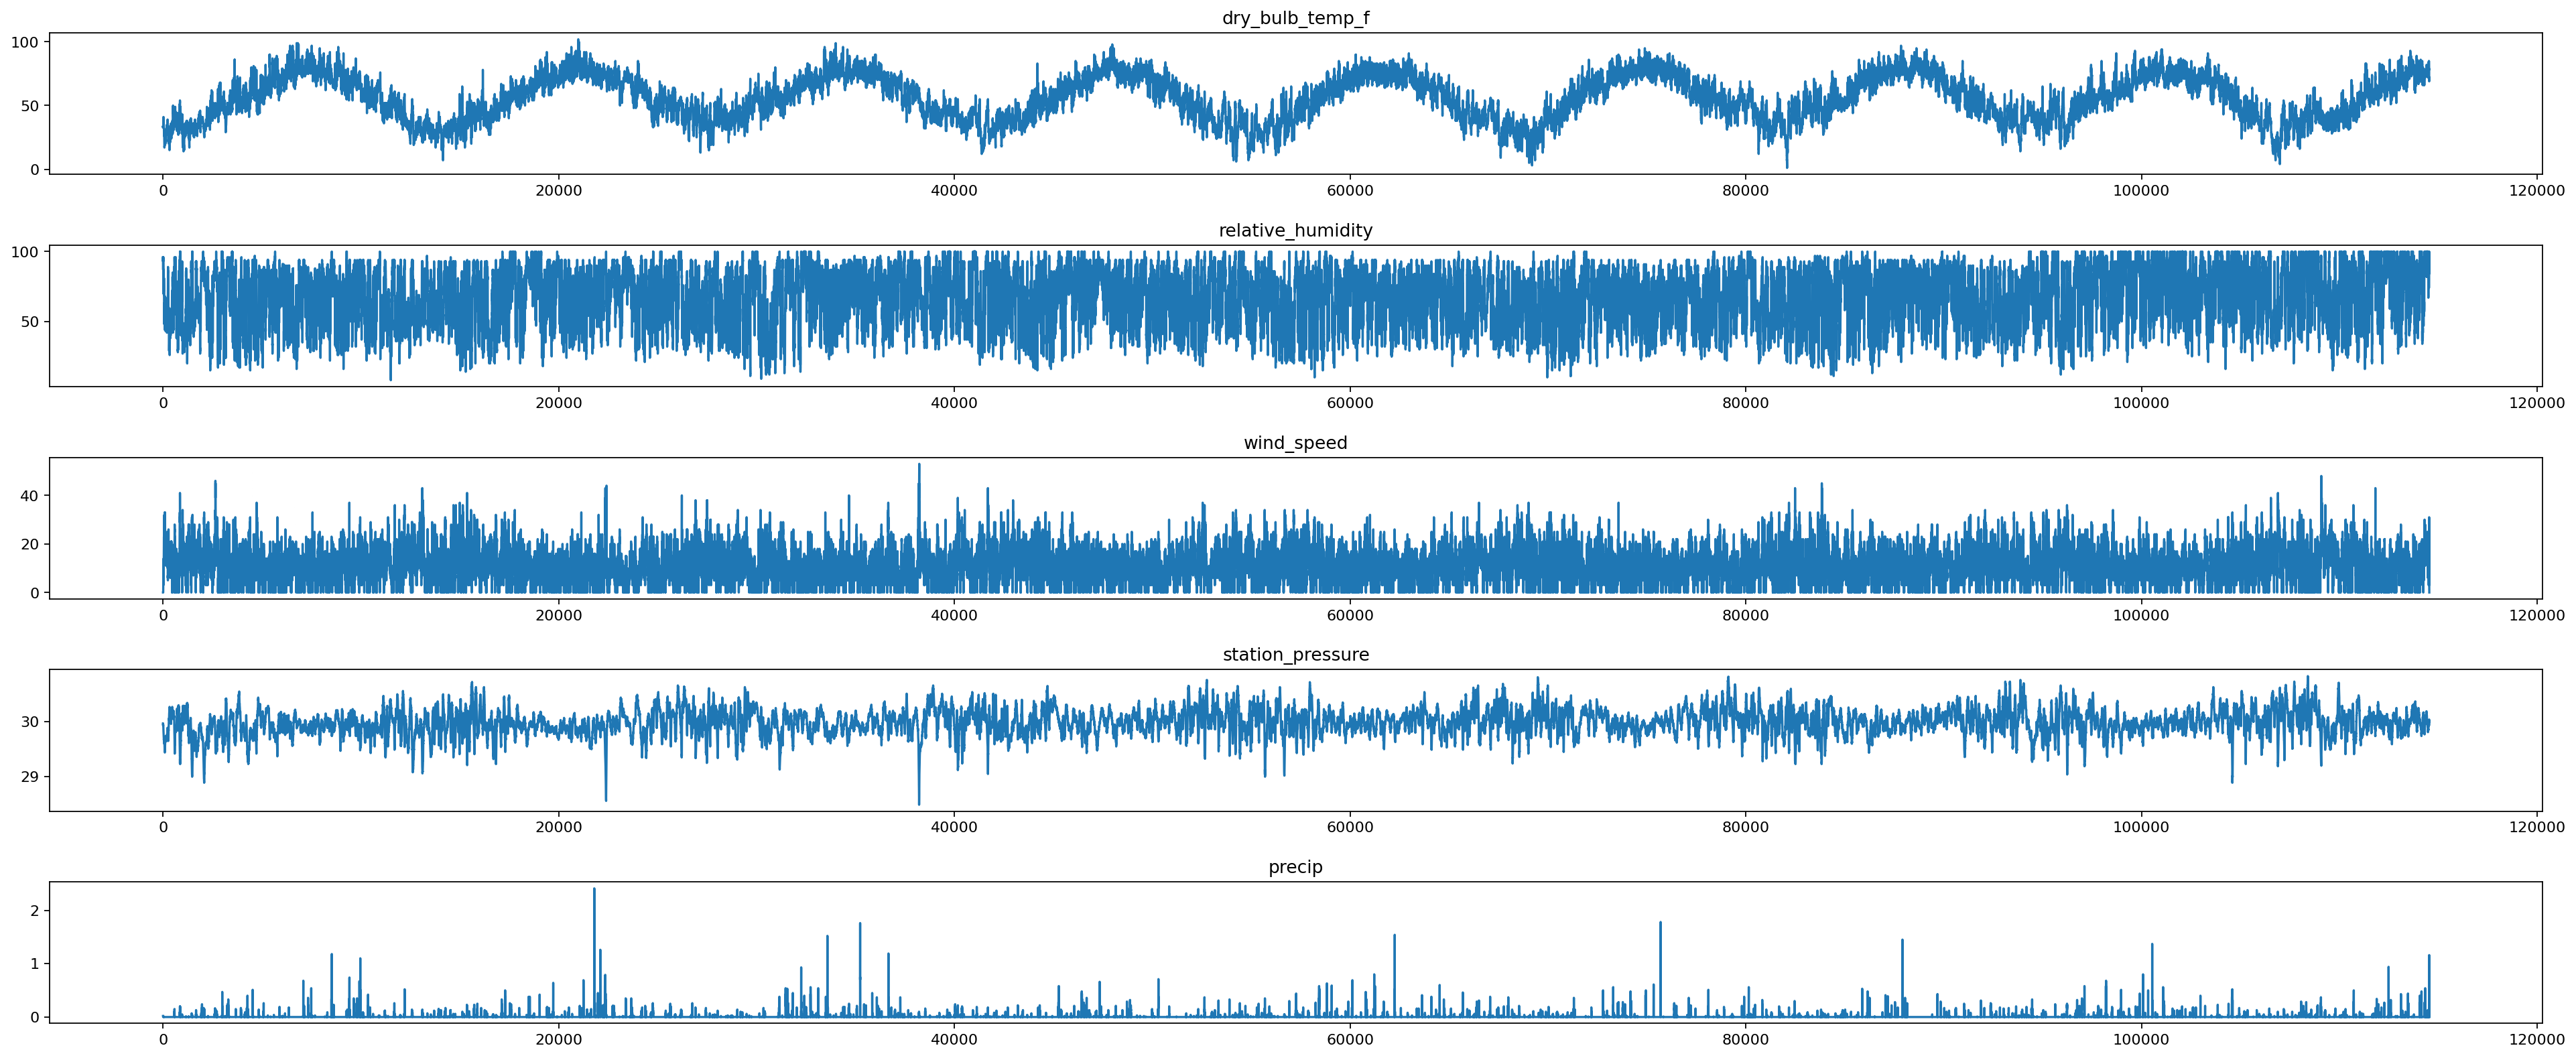

In [78]:
# Columns to visualize
plot_cols = ['dry_bulb_temp_f', 'relative_humidity', 'wind_speed', 'station_pressure', 'precip']
# Quick overview of columns
plt.figure(figsize=(30, 12))
i = 1
for col in plot_cols:
    plt.subplot(len(plot_cols), 1, i)
    plt.plot(data[col].values)
    plt.title(col)
    i += 1
plt.subplots_adjust(hspace=0.5)
plt.show()

Feature Dependencies

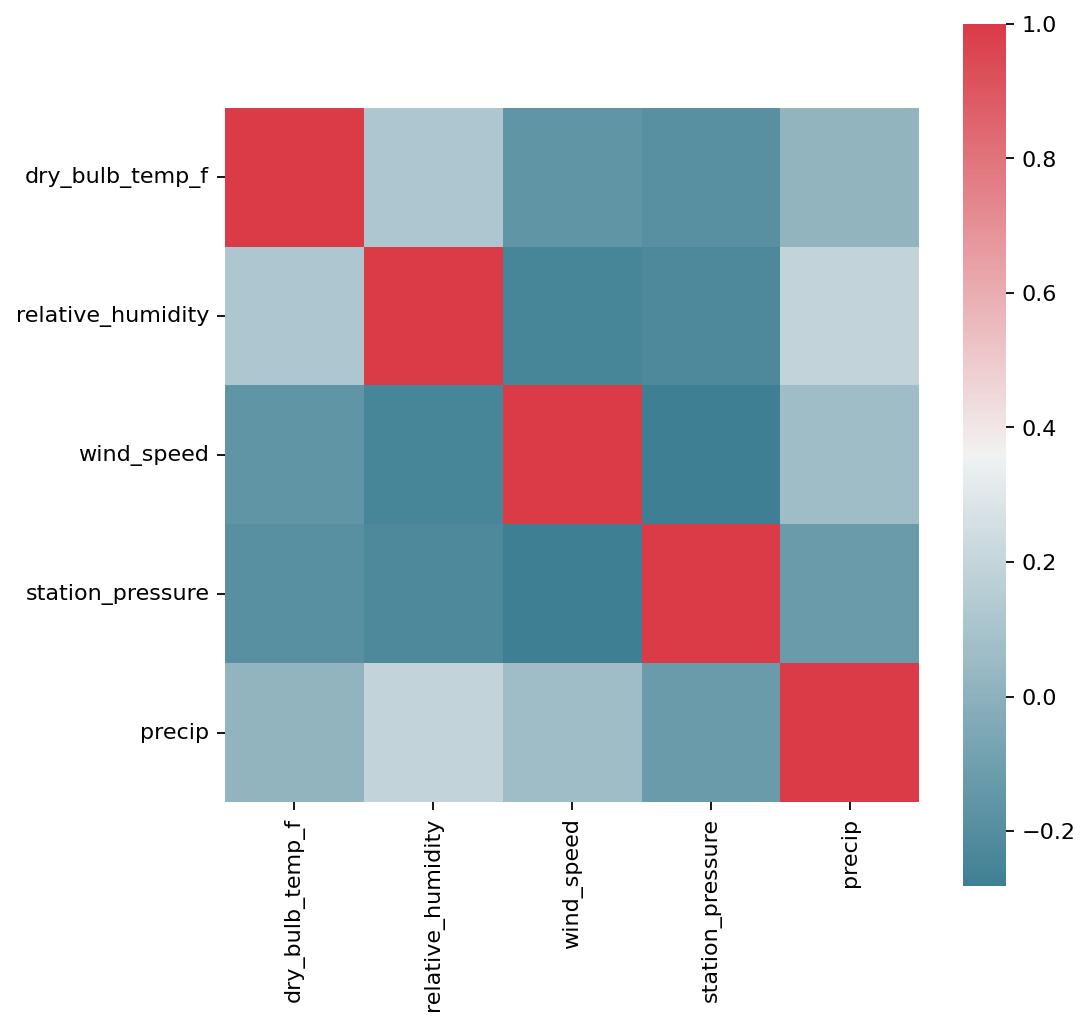

In [79]:
# Plot correlation matrix
f, ax = plt.subplots(figsize=(7, 7))
corr = data[plot_cols].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax);

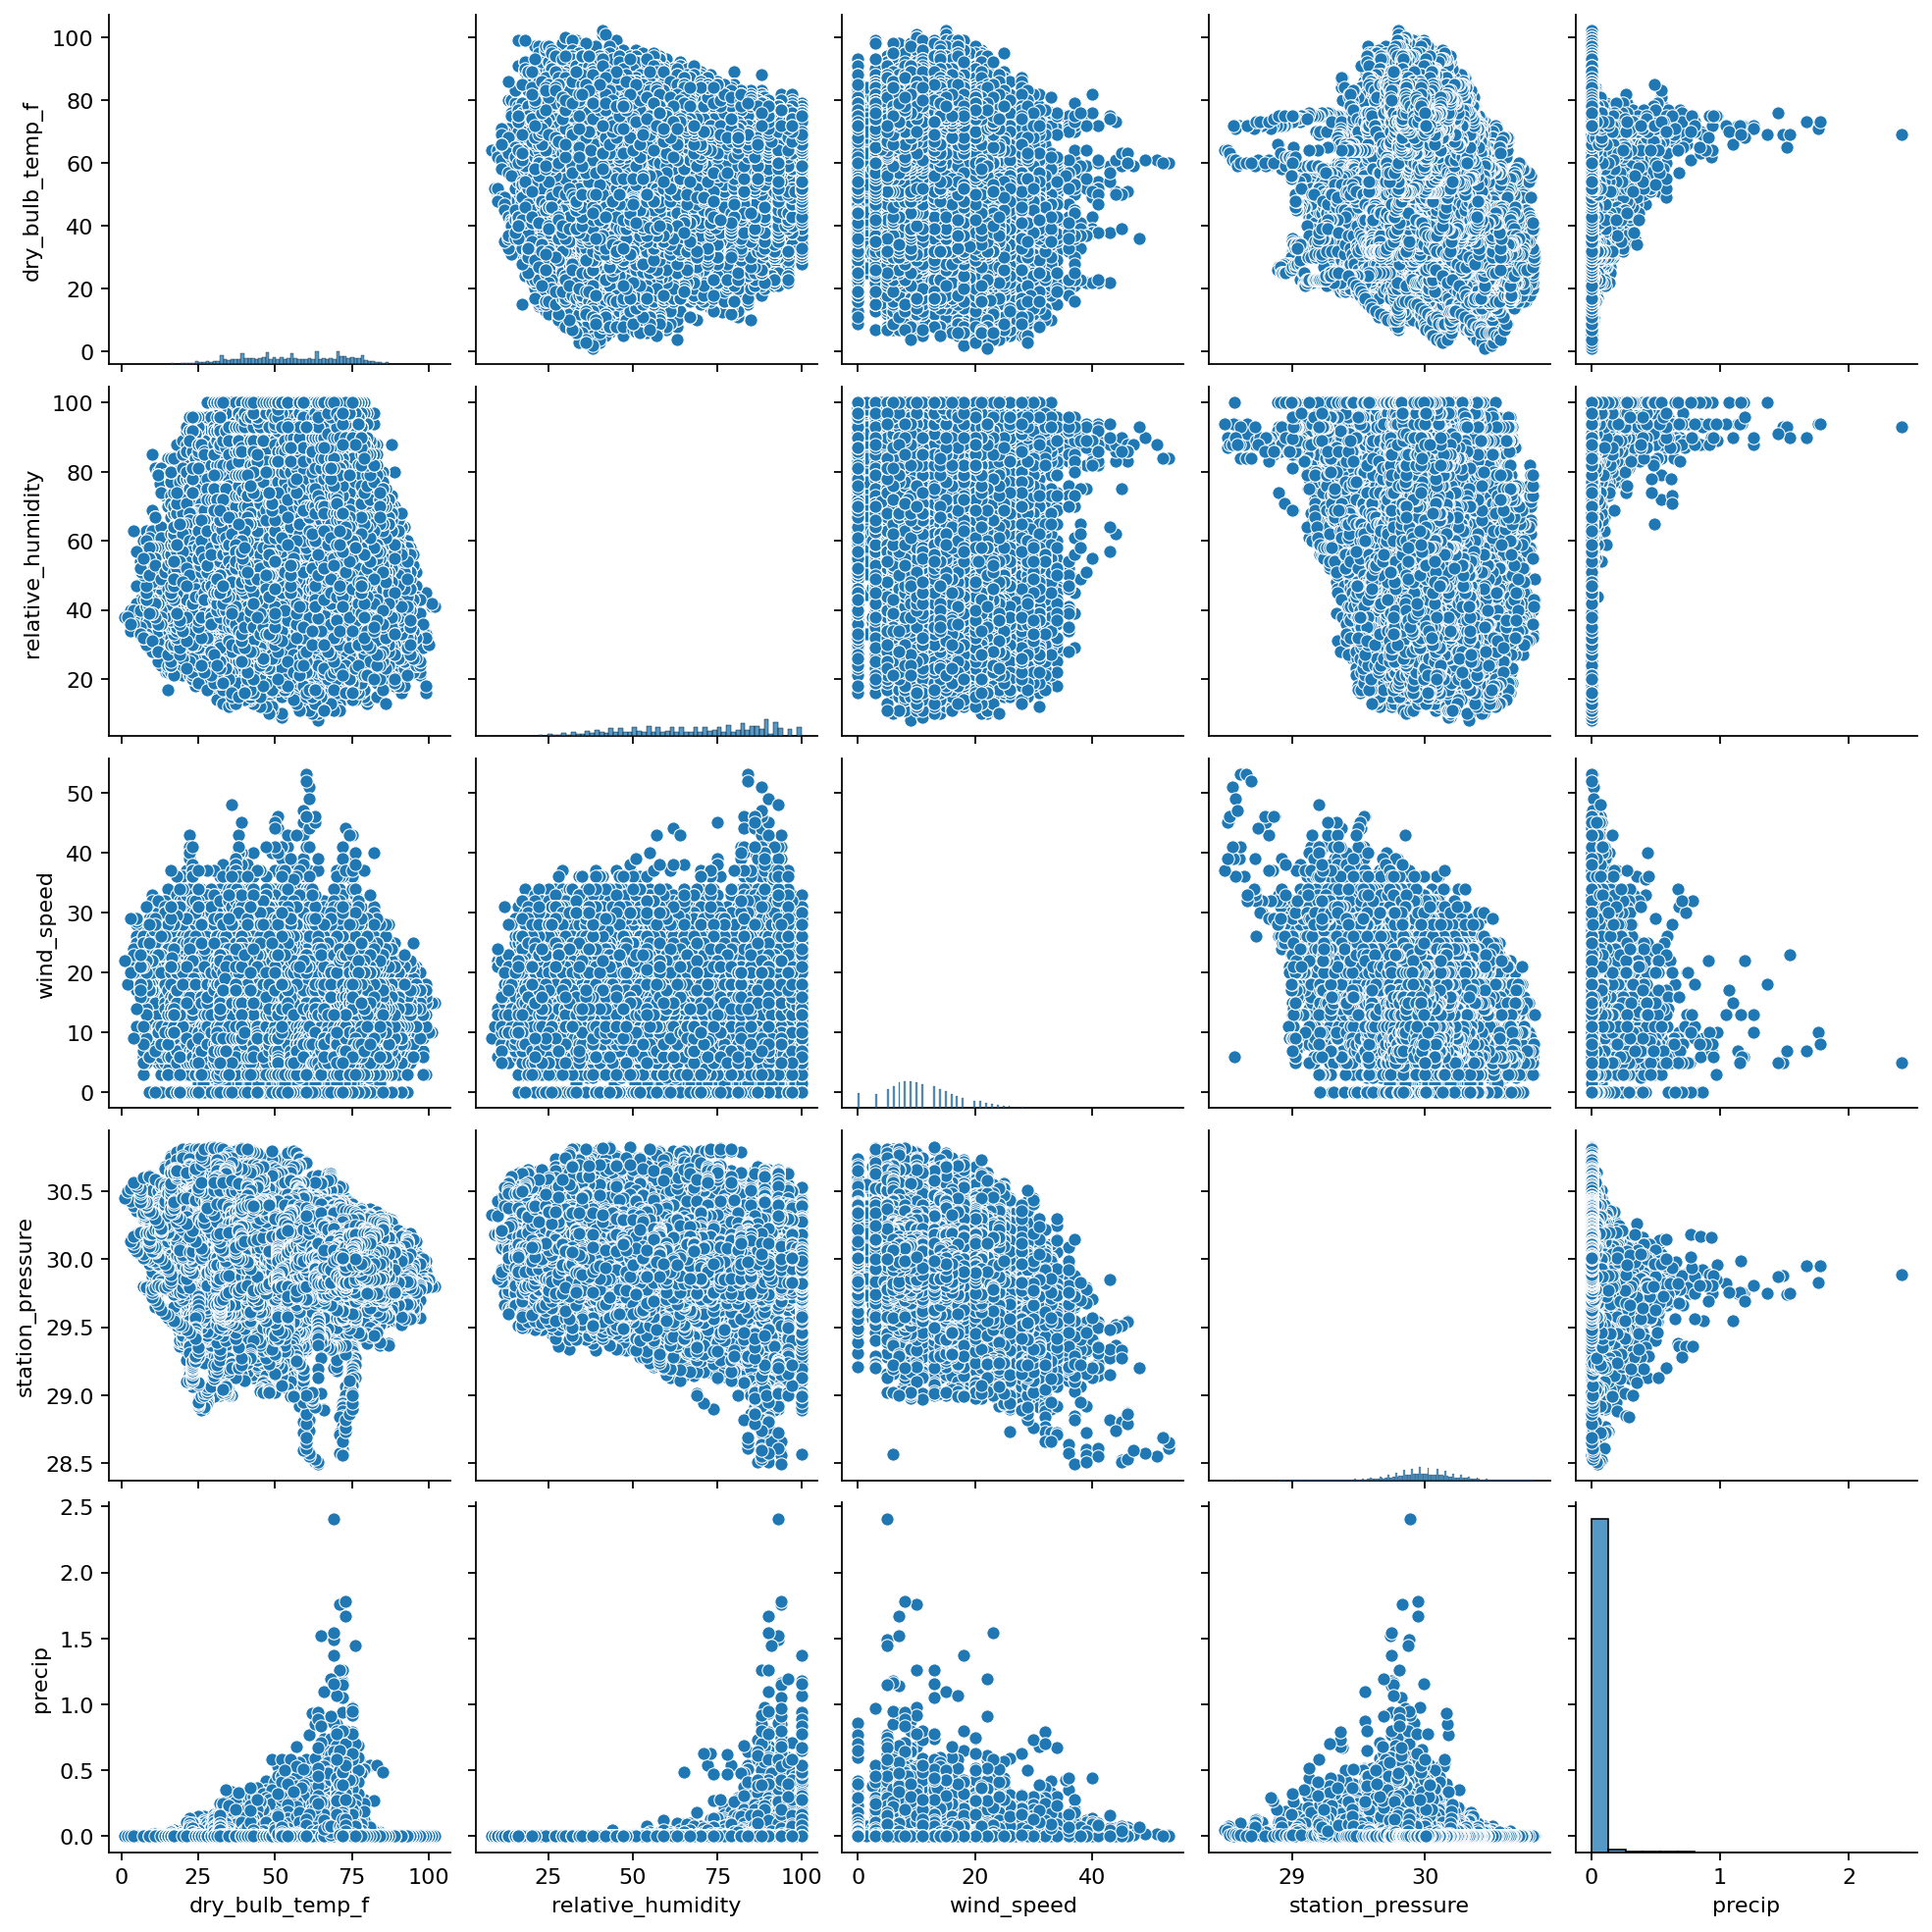

In [80]:
# Plot pairplots
sns.pairplot(data[plot_cols])

Analyze Trends in the Data

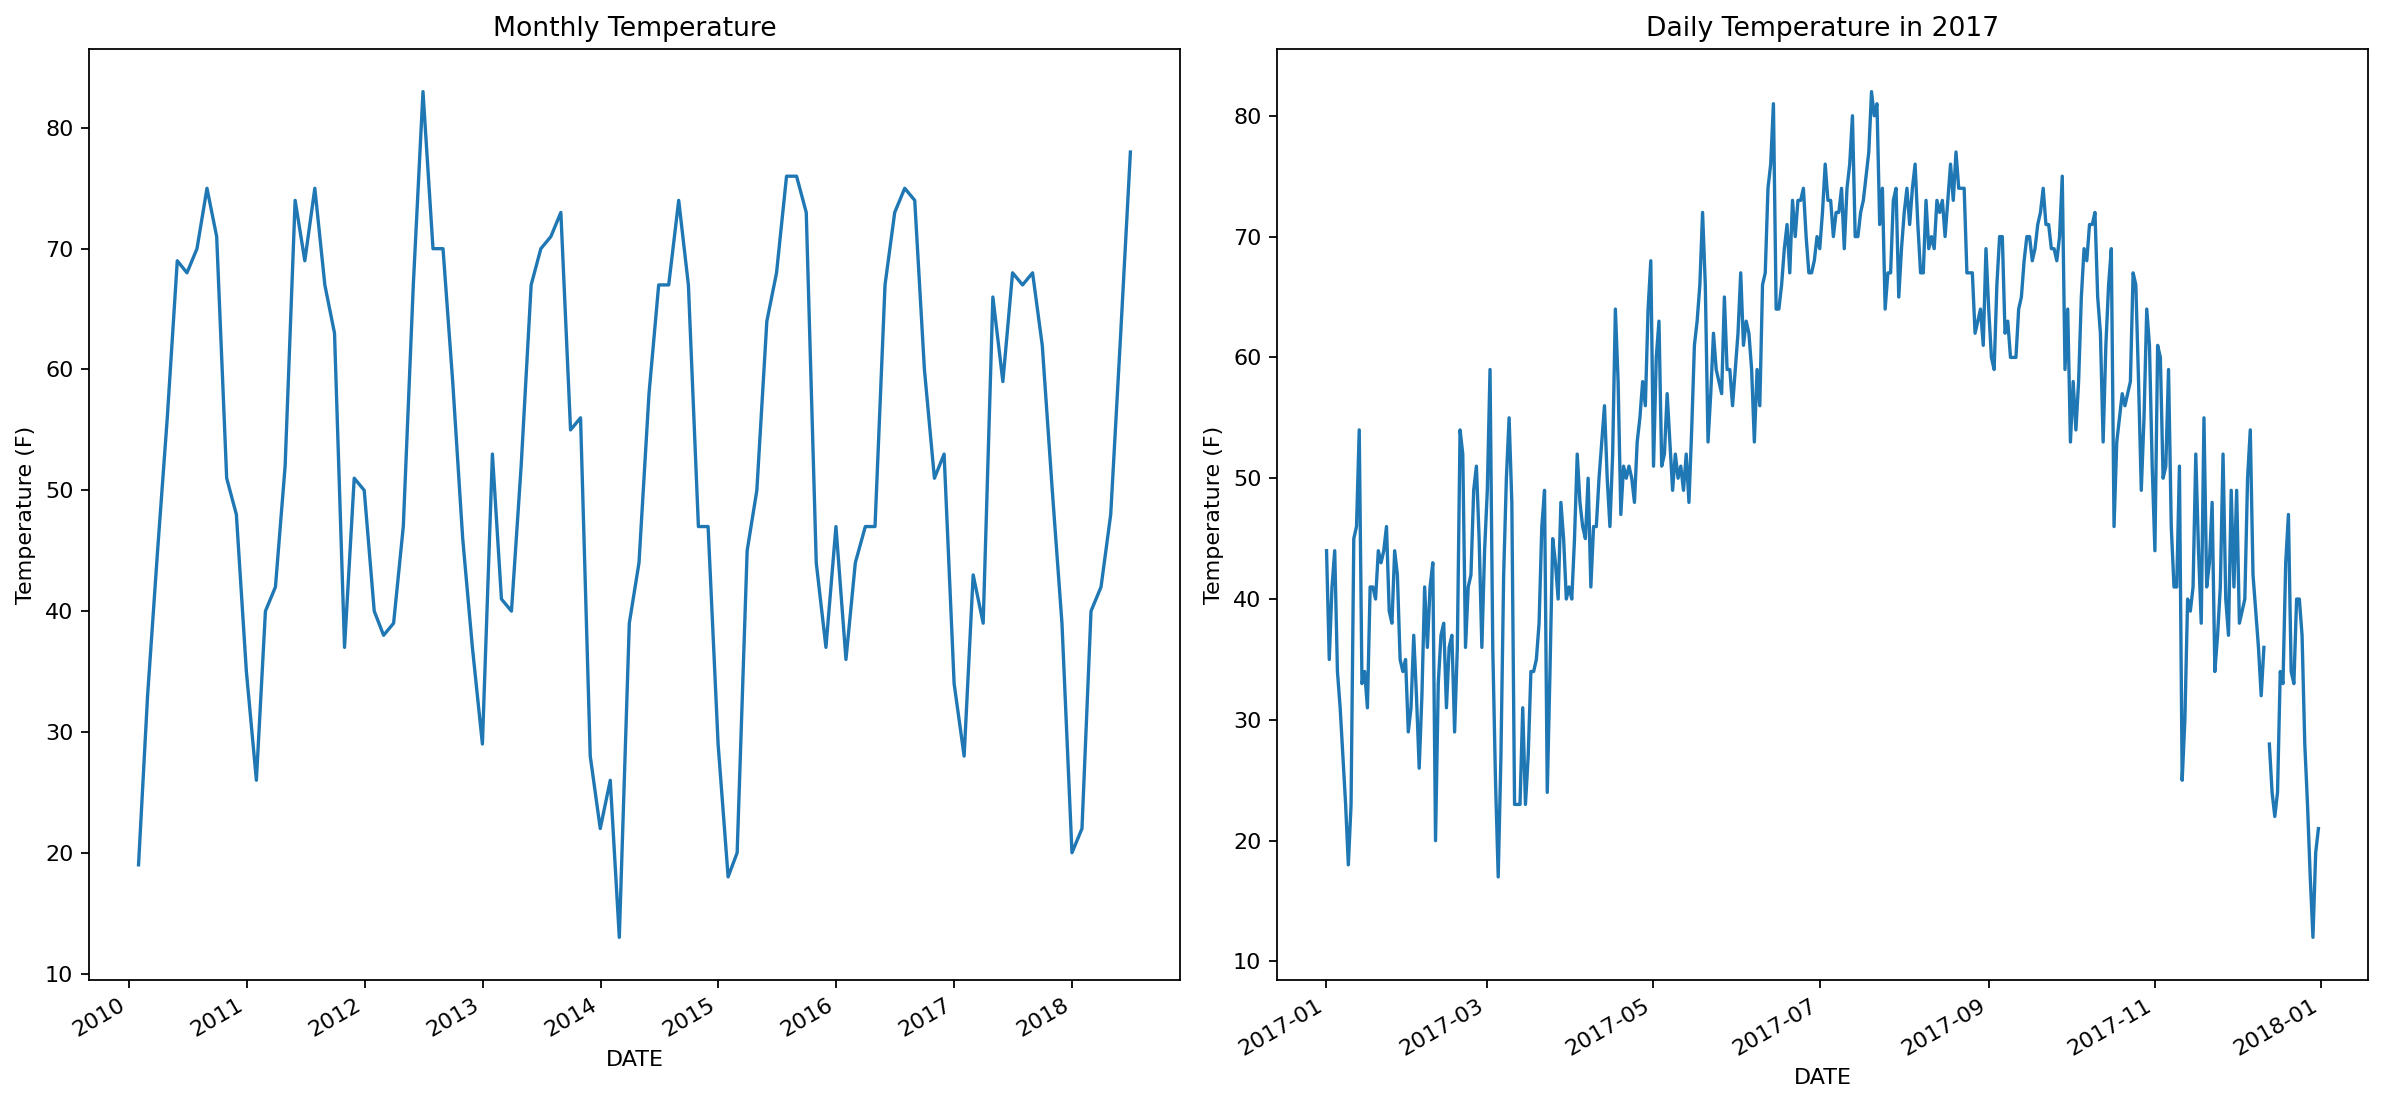

In [81]:
plt.figure(figsize=(15,7))

TEMP_COL = 'dry_bulb_temp_f'
# Plot temperature data converted to a monthly frequency
plt.subplot(1, 2, 1)
#data = data[~data.index.duplicated(keep='first')]
data[TEMP_COL].asfreq('ME').plot()
plt.title('Monthly Temperature')
plt.ylabel('Temperature (F)')

# Zoom in on a year and plot temperature data converted to a daily frequency
plt.subplot(1, 2, 2)
data.loc['2017', TEMP_COL].asfreq('D').plot()
plt.title('Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

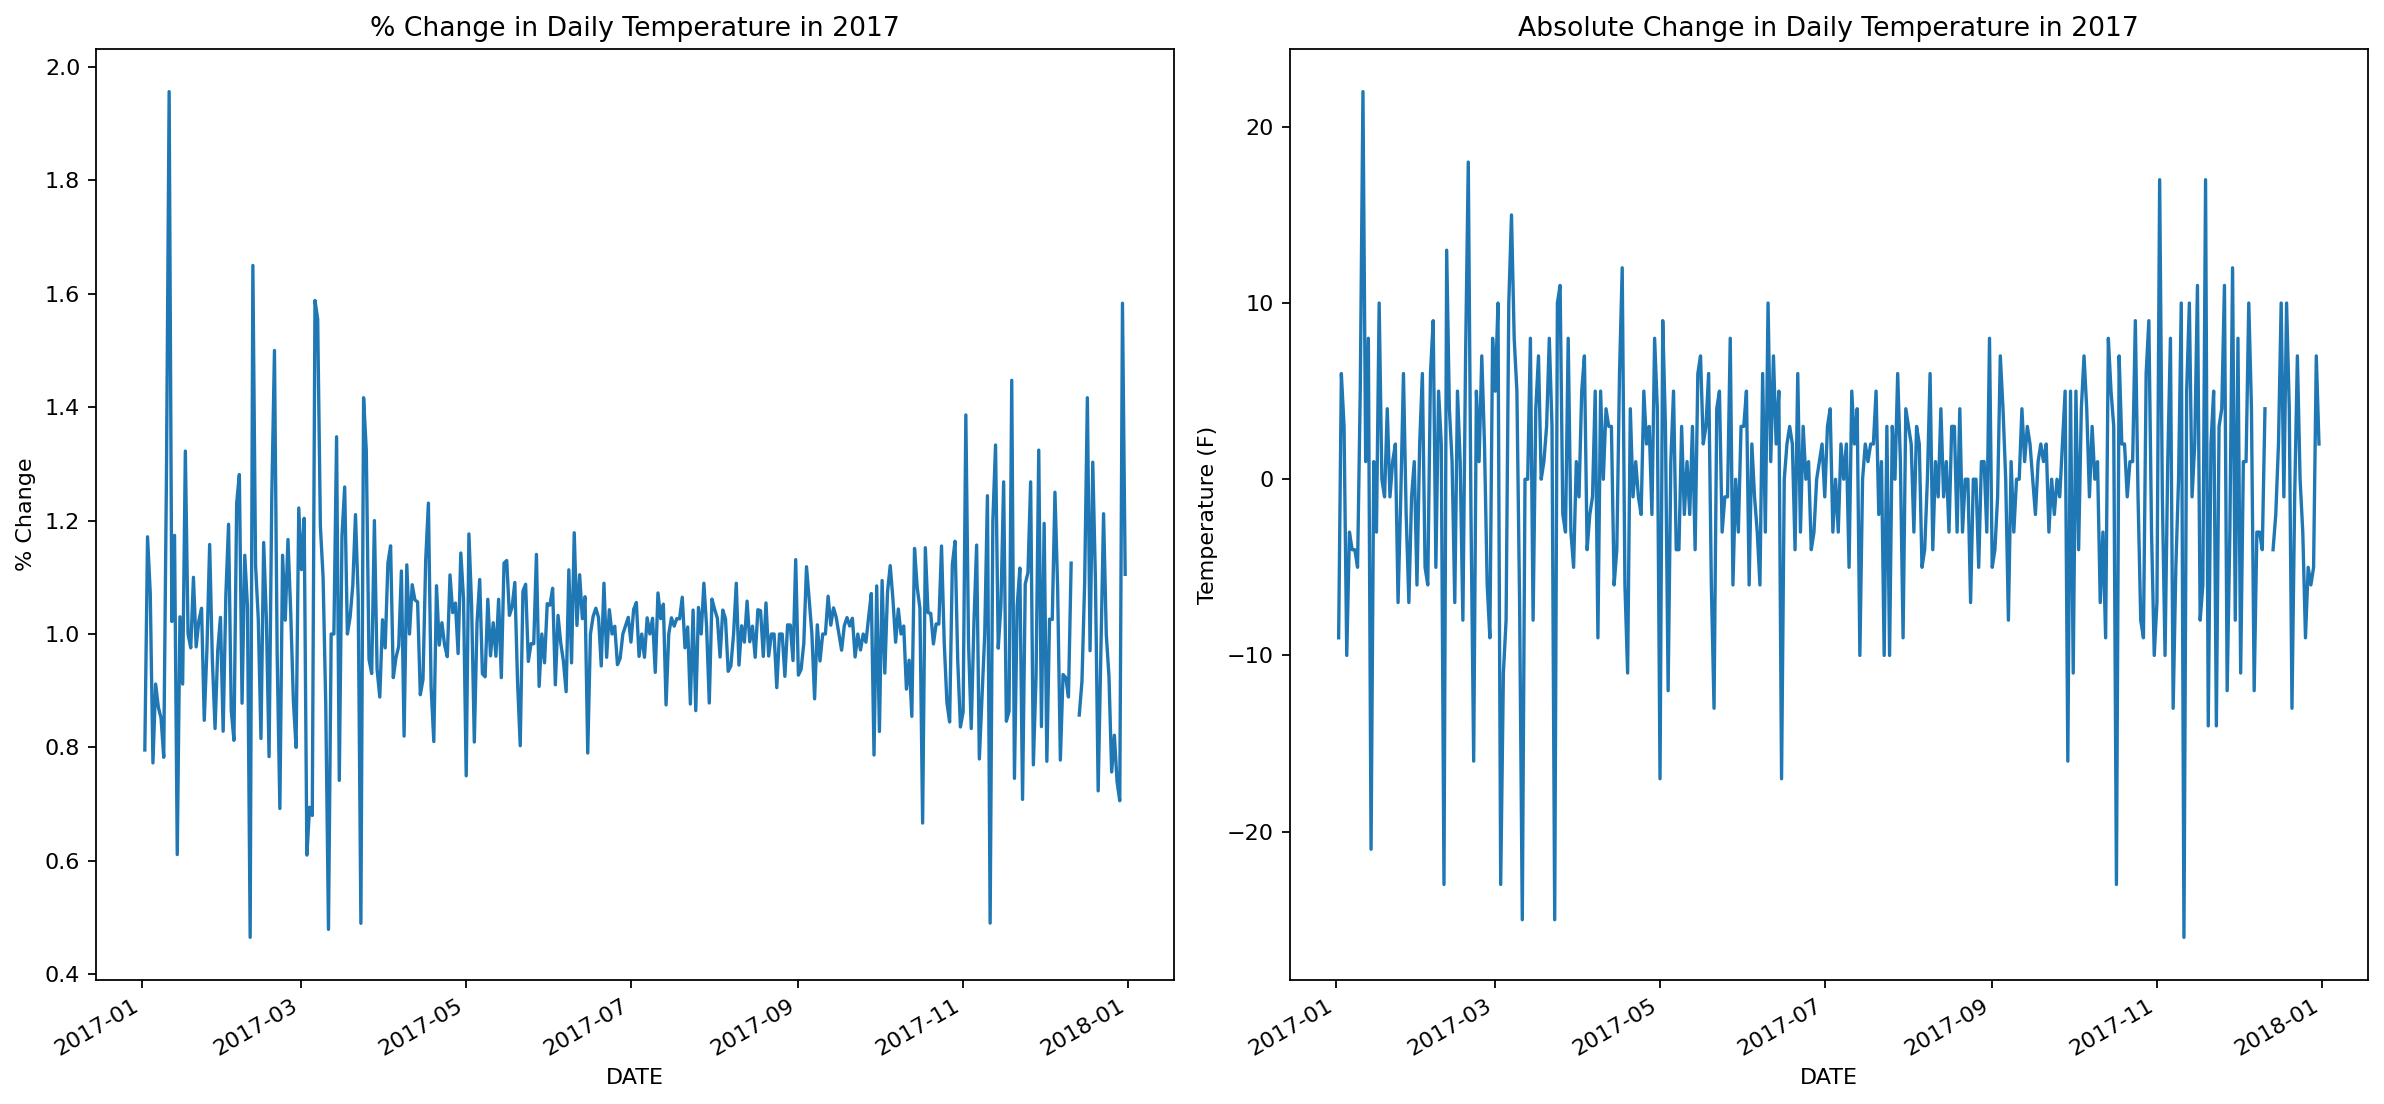

In [82]:
plt.figure(figsize=(15,7))

# Plot percent change of daily temperature in 2017
plt.subplot(1, 2, 1)
data.loc['2017', TEMP_COL].asfreq('D').div(
    data.loc['2017', TEMP_COL].asfreq('D').shift()
).plot()
plt.title('% Change in Daily Temperature in 2017')
plt.ylabel('% Change')

# Plot absolute change of temperature in 2017 with daily frequency
plt.subplot(1, 2, 2)

data.loc['2017', TEMP_COL].asfreq('D').diff().plot()

plt.title('Absolute Change in Daily Temperature in 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

Smoothing to the data in the form of a rolling/moving average.

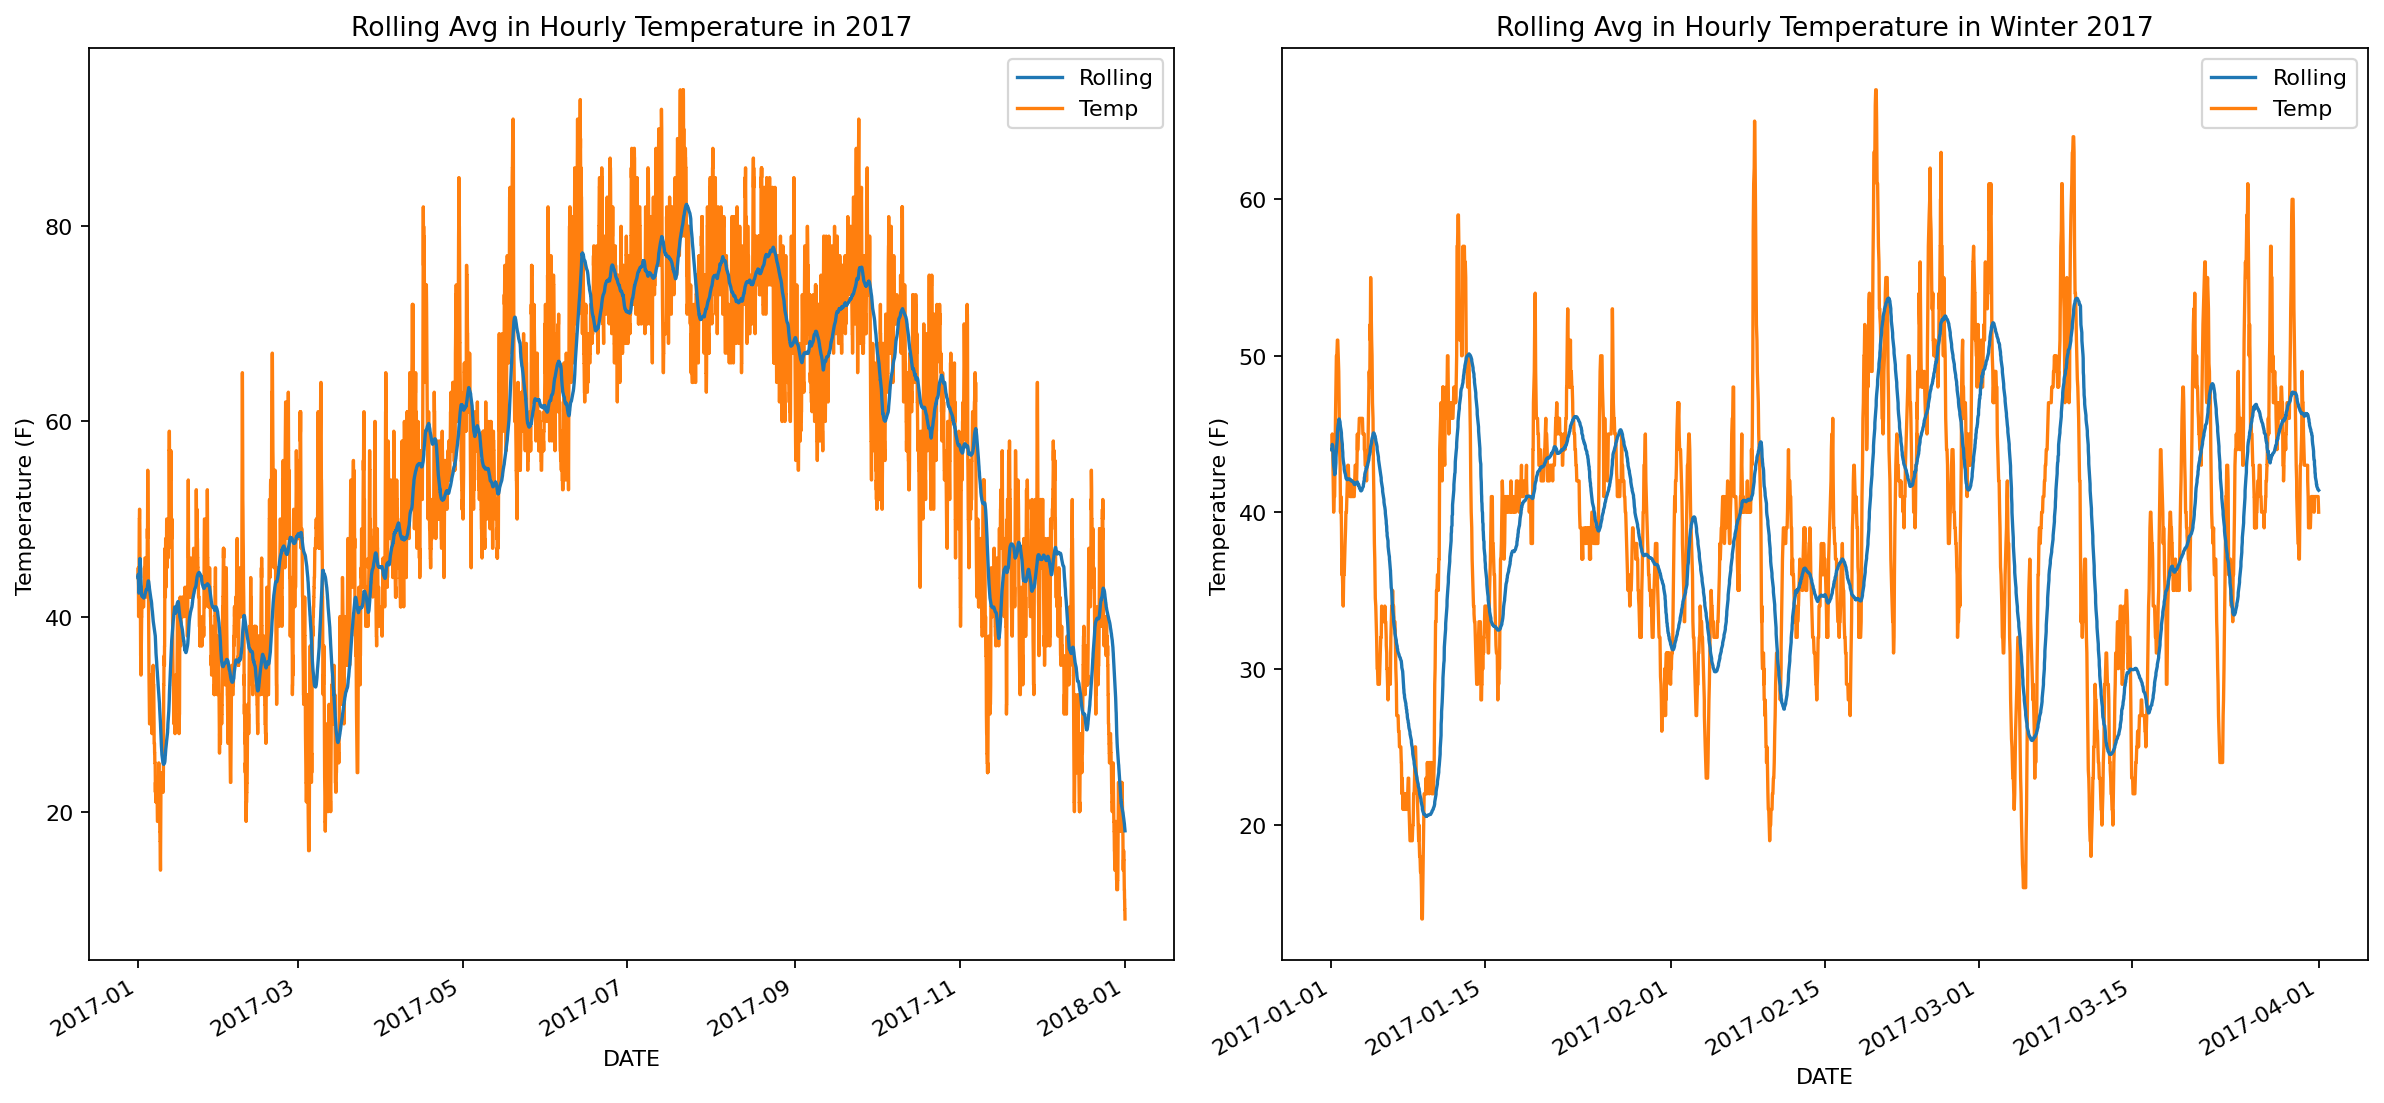

In [83]:
plt.figure(figsize=(15, 7))

# Plot rolling mean of temperature
plt.subplot(1, 2, 1)
data.loc['2017', TEMP_COL].rolling('5D').mean().plot(zorder=2)  # 5-day rolling mean
data.loc['2017', TEMP_COL].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title('Rolling Avg in Hourly Temperature in 2017')
plt.ylabel('Temperature (F)')

# Plot rolling mean of temperature for Jan–Mar 2017
plt.subplot(1, 2, 2)
data.loc['2017-01':'2017-03', TEMP_COL].rolling('2D').mean().plot(zorder=2)  # 2-day rolling mean
data.loc['2017-01':'2017-03', TEMP_COL].plot(zorder=1)
plt.legend(['Rolling', 'Temp'])
plt.title('Rolling Avg in Hourly Temperature in Winter 2017')
plt.ylabel('Temperature (F)')

plt.tight_layout()
plt.show()

# Time Series Forcasting

Only 8 years of daatset

In [86]:
data.reset_index(inplace=True)
data['DATE'] = pd.to_datetime(data['DATE'])

# Step 2: Set 'DATE' as the index
data.set_index('DATE', inplace=True)

# Step 3: Now slice using date strings
sample = data['2010-01-01':'2018-01-01']
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 106797 entries, 2010-01-01 01:51:00 to 2018-01-01 23:59:00
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   visibility               106797 non-null  float64
 1   dry_bulb_temp_f          106797 non-null  float64
 2   wet_bulb_temp_f          106797 non-null  float64
 3   dew_point_temp_f         106797 non-null  float64
 4   relative_humidity        106797 non-null  float64
 5   wind_speed               106797 non-null  float64
 6   station_pressure         106797 non-null  float64
 7   sea_level_pressure       106797 non-null  float64
 8   precip                   106797 non-null  float64
 9   altimeter_setting        106797 non-null  float64
 10  wind_direction_sin       106797 non-null  float64
 11  wind_direction_cos       106797 non-null  float64
 12  pressure_tendency_incr   106797 non-null  int64  
 13  pressure_tendency_decr   

Create Training/Validation/Test Splits
we use 80% of the data for the training set and 10% each for validation and test sets.

In [87]:
def split_data(data, val_size=0.1, test_size=0.1):
    """
    Splits data to training, validation and testing parts
    """
    ntest = int(round(len(data) * (1 - test_size)))
    nval = int(round(len(data) * (1 - test_size - val_size)))

    df_train, df_val, df_test = data.iloc[:nval], data.iloc[nval:ntest], data.iloc[ntest:]

    return df_train, df_val, df_test


# Create data split
df_train, df_val, df_test = split_data(sample)

print('Total data size:      {} rows'.format(len(sample)))
print('Training set size:    {} rows'.format(len(df_train)))
print('Validation set size:  {} rows'.format(len(df_val)))
print('Test set size:        {} rows'.format(len(df_test)))

Total data size:      106797 rows
Training set size:    85438 rows
Validation set size:  10679 rows
Test set size:        10680 rows


Explore Baseline Models

In [88]:
# define the column containing the data we wish to model - in this case Dry Bulb Temperature (F)
Y_COL = 'dry_bulb_temp_f'

# Use shifting and rolling averages to predict Y_COL (t)
n_in = 2
n_out = 1
features = [Y_COL]
n_features = len(features)

# create the baseline on the entire sample dataset.
# we will evaluate the prediction error on the validation set
baseline = sample[[Y_COL]].loc[:]
baseline['{} (t-1)'.format(Y_COL)] = baseline[Y_COL].shift(1)
baseline['{} (t-2)'.format(Y_COL)] = baseline[Y_COL].shift(2)
baseline['{} (6hr rollavg)'.format(Y_COL)] = baseline[Y_COL].rolling('6H').mean()
baseline['{} (12hr rollavg)'.format(Y_COL)] = baseline[Y_COL].rolling('12H').mean()
baseline.dropna(inplace=True)
baseline.head(10)

/tmp/ipython-input-1624613374.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  baseline['{} (6hr rollavg)'.format(Y_COL)] = baseline[Y_COL].rolling('6H').mean()
/tmp/ipython-input-1624613374.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  baseline['{} (12hr rollavg)'.format(Y_COL)] = baseline[Y_COL].rolling('12H').mean()


dry_bulb_temp_f  dry_bulb_temp_f (t-1)  \
DATE                                                          
2010-01-01 02:28:00             34.0                   34.0   
2010-01-01 02:51:00             33.0                   34.0   
2010-01-01 03:51:00             33.0                   33.0   
2010-01-01 04:00:00             33.0                   33.0   
2010-01-01 04:51:00             33.0                   33.0   
2010-01-01 05:49:00             34.0                   33.0   
2010-01-01 05:51:00             33.0                   34.0   
2010-01-01 06:51:00             33.0                   33.0   
2010-01-01 07:00:00             33.0                   33.0   
2010-01-01 07:19:00             34.0                   33.0   

                     dry_bulb_temp_f (t-2)  dry_bulb_temp_f (6hr rollavg)  \
DATE                                                                        
2010-01-01 02:28:00                   33.0                      33.666667   
2010-01-01 02:51:00                   34.0                      33.500000   
2010-01-01 03:51:00                   34.0                      33.400000   
2010-01-01 04:00:00                   33.0                      33.333333   
2010-01-01 04:51:00                   33.0                      33.285714   
2010-01-01 05:49:00                   33.0                      33.375000   
2010-01-01 05:51:00                   33.0                      33.333333   
2010-01-01 06:51:00                   34.0                      33.300000   
2010-01-01 07:00:00                   33.0                      33.272727   
2010-01-01 07:19:00                   33.0                      33.333333   

                     dry_bulb_temp_f (12hr rollavg)  
DATE                                                 
2010-01-01 02:28:00                       33.666667  
2010-01-01 02:51:00                       33.500000  
2010-01-01 03:51:00                       33.400000  
2010-01-01 04:00:00                       33.333333  
2010-01-01 04:51:00                       33.285714  
2010-01-01 05:49:00                       33.375000  
2010-01-01 05:51:00                       33.333333  
2010-01-01 06:51:00                       33.300000  
2010-01-01 07:00:00                       33.272727  
2010-01-01 07:19:00                       33.333333

In [89]:
# plot first 7 days of the validation set, 168 hours
start = df_val.index[0]
end = df_val.index[167]
sliced = baseline[start:end]

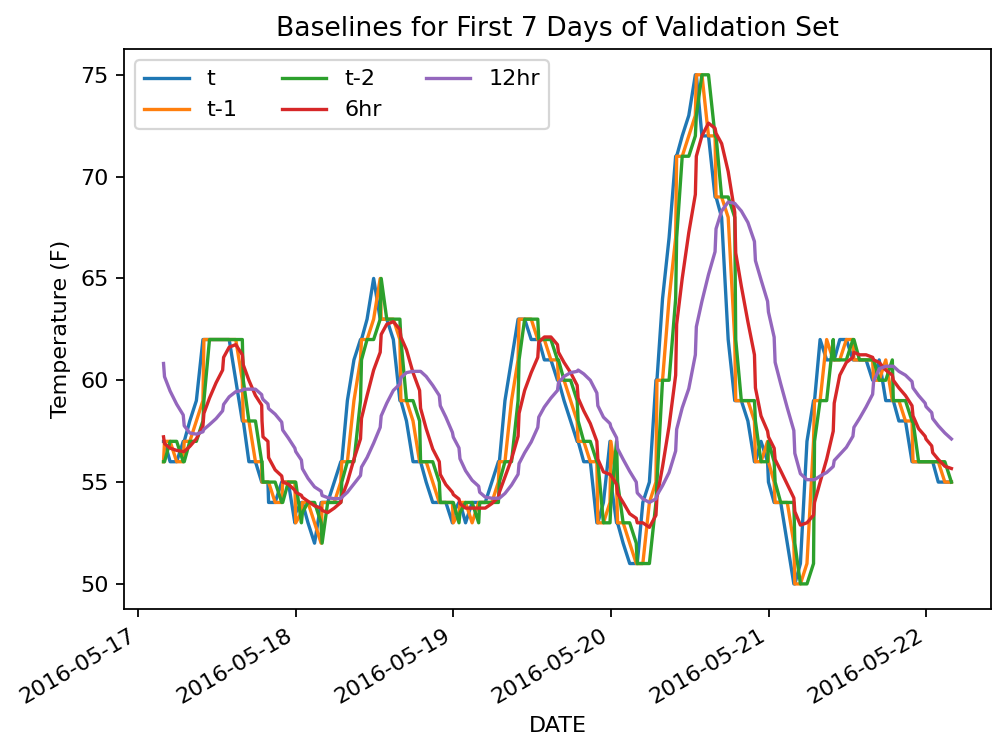

In [90]:
# Plot baseline predictions sample
cols = ['dry_bulb_temp_f', 'dry_bulb_temp_f (t-1)', 'dry_bulb_temp_f (t-2)', 'dry_bulb_temp_f (6hr rollavg)', 'dry_bulb_temp_f (12hr rollavg)']
sliced[cols].plot()

plt.legend(['t', 't-1', 't-2', '6hr', '12hr'], loc=2, ncol=3)
plt.title('Baselines for First 7 Days of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.rcParams['figure.dpi'] = 100
plt.show()

Evaluate baseline model using RMSE

In [91]:
# Calculating baseline RMSE
start_val = df_val.index[0]
end_val = df_val.index[-1]
baseline_val = baseline[start_val:end_val]

baseline_y = baseline_val[Y_COL]
baseline_t1 = baseline_val['dry_bulb_temp_f (t-1)']
baseline_t2 = baseline_val['dry_bulb_temp_f (t-2)']
baseline_avg6 = baseline_val['dry_bulb_temp_f (6hr rollavg)']
baseline_avg12 = baseline_val['dry_bulb_temp_f (12hr rollavg)']

rmse_t1 = round(np.sqrt(mean_squared_error(baseline_y, baseline_t1)), 2)
rmse_t2 = round(np.sqrt(mean_squared_error(baseline_y, baseline_t2)), 2)
rmse_avg6 = round(np.sqrt(mean_squared_error(baseline_y, baseline_avg6)), 2)
rmse_avg12 = round(np.sqrt(mean_squared_error(baseline_y, baseline_avg12)), 2)

print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))
print('Baseline t-2 RMSE:            {0:.3f}'.format(rmse_t2))
print('Baseline 6hr rollavg RMSE:    {0:.3f}'.format(rmse_avg6))
print('Baseline 12hr rollavg RMSE:   {0:.3f}'.format(rmse_avg12))

Baseline t-1 RMSE:            1.370
Baseline t-2 RMSE:            2.130
Baseline 6hr rollavg RMSE:    2.940
Baseline 12hr rollavg RMSE:   4.620


Train Statistical Time-series Analysis Models

we will explore one called SARIMAX - the Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model.

In [92]:
# Replicating a basline model
X_train = df_train[Y_COL]
X_val = df_val[Y_COL]
X_both = np.hstack((X_train, X_val))

we created a variable called X_both to cover both the training and validation data. This is required later when we forecast values for our SARIMAX model, in order to give the model access to all the datapoints for which it must create forecasts. Note that the forecasts themselves will only be based on the model weights learned from the training data.
To create an AR(1) model, we set the order to be (1, 0, 0). This sets up the AR model to be a lag 1 model. Then, we fit our model on the training data and inspect a summary of the trained model.

In [93]:

order = (1, 0, 0)
model_ar1 = SARIMAX(X_train, order=order)
results_ar1 = model_ar1.fit()
results_ar1.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        dry_bulb_temp_f   No. Observations:                85438
Model:               SARIMAX(1, 0, 0)   Log Likelihood             -149663.753
Date:                Fri, 16 Jan 2026   AIC                         299331.507
Time:                        12:06:00   BIC                         299350.218
Sample:                             0   HQIC                        299337.226
                              - 85438                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997   7.77e-05   1.29e+04      0.000       1.000       1.000
sigma2         1.9454      0.005    389.095      0.000       1.936       1.955
===================================================================================
Ljung-Box (L1) (Q):                3576.90   Jarque-Bera (JB):             92291.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.15
Prob(H) (two-sided):                  0.87   Kurtosis:                         8.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Let's create our model forecast on the validation dataset. We will then plot a few data points like we did with our baseline models (using 7 days of validation data) and compute the RMSE value based on the full validation set.

In [94]:
full_data_ar1 = SARIMAX(X_both, order=order)
model_forecast_ar1 = full_data_ar1.filter(results_ar1.params)

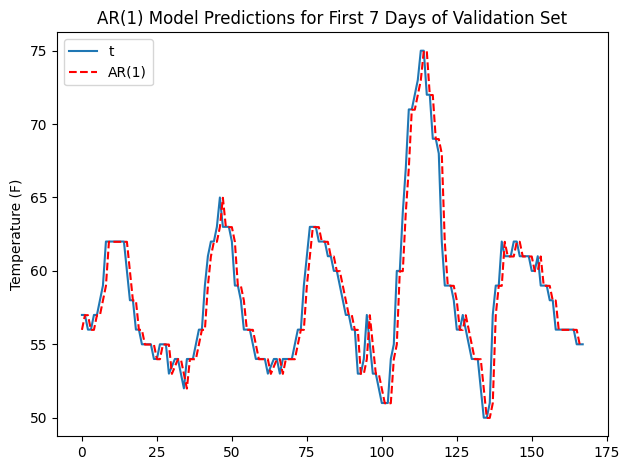

In [95]:
start = len(X_train)
end = len(X_both)
forecast_ar1 = model_forecast_ar1.predict(start=start, end=end - 1, dynamic=False)

# plot actual vs predicted values for the same 7-day window for easier viewing
plt.plot(sliced[Y_COL].values)
plt.plot(forecast_ar1[:168], color='r', linestyle='--')
plt.legend(['t', 'AR(1)'], loc=2)
plt.title('AR(1) Model Predictions for First 7 Days of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.show()

In [96]:
# compute print RMSE values
rmse_ar1 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar1))
print('AR(1) RMSE:                   {0:.3f}'.format(rmse_ar1))
print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))

AR(1) RMSE:                   1.371
Baseline t-1 RMSE:            1.370


Create a more complex model

In [97]:
order = (2, 0, 0)
model_ar2 = SARIMAX(X_train, order=order)
results_ar2 = model_ar2.fit()
results_ar2.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        dry_bulb_temp_f   No. Observations:                85438
Model:               SARIMAX(2, 0, 0)   Log Likelihood             -147833.870
Date:                Fri, 16 Jan 2026   AIC                         295673.740
Time:                        12:13:51   BIC                         295701.807
Sample:                             0   HQIC                        295682.318
                              - 85438                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2044      0.003    480.678      0.000       1.200       1.209
ar.L2         -0.2048      0.003    -81.499      0.000      -0.210      -0.200
sigma2         1.8638      0.005    399.534      0.000       1.855       1.873
===================================================================================
Ljung-Box (L1) (Q):                 106.65   Jarque-Bera (JB):            107422.04
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.06
Prob(H) (two-sided):                  0.72   Kurtosis:                         8.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [98]:
full_data_ar2 = SARIMAX(X_both, order=order)
model_forecast_ar2 = full_data_ar2.filter(results_ar2.params)

start = len(X_train)
end = len(X_both)
forecast_ar2 = model_forecast_ar2.predict(start=start, end=end - 1, dynamic=False)

# compute print RMSE values
rmse_ar2 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar2))
print('AR(2) RMSE:                   {0:.3f}'.format(rmse_ar2))
print('AR(1) RMSE:                   {0:.3f}'.format(rmse_ar1))
print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))

AR(2) RMSE:                   1.341
AR(1) RMSE:                   1.371
Baseline t-1 RMSE:            1.370


Incorporate moving averages

In [99]:
order = (2, 0, 1)
model_ar2ma1 = SARIMAX(X_train, order=order)
results_ar2ma1 = model_ar2ma1.fit()
results_ar2ma1.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        dry_bulb_temp_f   No. Observations:                85438
Model:               SARIMAX(2, 0, 1)   Log Likelihood             -146083.372
Date:                Fri, 16 Jan 2026   AIC                         292174.743
Time:                        12:16:30   BIC                         292212.165
Sample:                             0   HQIC                        292186.181
                              - 85438                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7707      0.006    321.540      0.000       1.760       1.782
ar.L2         -0.7711      0.006   -140.003      0.000      -0.782      -0.760
ma.L1         -0.5829      0.007    -89.311      0.000      -0.596      -0.570
sigma2         1.7848      0.004    409.882      0.000       1.776       1.793
===================================================================================
Ljung-Box (L1) (Q):                 170.62   Jarque-Bera (JB):            123823.02
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                            -0.02
Prob(H) (two-sided):                  0.87   Kurtosis:                         8.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
full_data_ar2ma1 = SARIMAX(X_both, order=order)
model_forecast_ar2ma1 = full_data_ar2ma1.filter(results_ar2ma1.params)

start = len(X_train)
end = len(X_both)
forecast_ar2ma1 = model_forecast_ar2ma1.predict(start=start, end=end - 1, dynamic=False)

# compute print RMSE values
rmse_ar2ma1 = np.sqrt(mean_squared_error(baseline_val[Y_COL], forecast_ar2ma1))
print('AR(2) MA(1) RMSE:             {0:.3f}'.format(rmse_ar2ma1))
print('AR(2) RMSE:                   {0:.3f}'.format(rmse_ar2))
print('AR(1) RMSE:                   {0:.3f}'.format(rmse_ar1))
print('Baseline t-1 RMSE:            {0:.3f}'.format(rmse_t1))

AR(2) MA(1) RMSE:             1.313
AR(2) RMSE:                   1.341
AR(1) RMSE:                   1.371
Baseline t-1 RMSE:            1.370


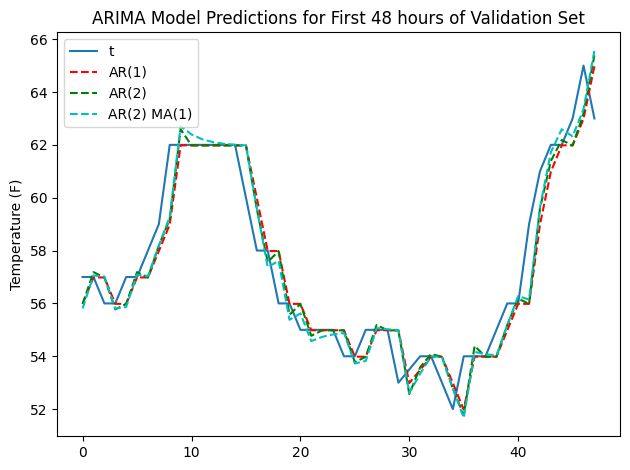

In [101]:
# plot actual vs predicted values for a smaller 2-day window for easier viewing
hrs = 48
plt.plot(sliced[Y_COL][:hrs].values)
plt.plot(forecast_ar1[:hrs], color='r', linestyle='--')
plt.plot(forecast_ar2[:hrs], color='g', linestyle='--')
plt.plot(forecast_ar2ma1[:hrs], color='c', linestyle='--')
plt.legend(['t', 'AR(1)', 'AR(2)', 'AR(2) MA(1)'], loc=2, ncol=1)
plt.title('ARIMA Model Predictions for First 48 hours of Validation Set')
plt.ylabel('Temperature (F)')
plt.tight_layout()
plt.show()